In [6]:
!pip install nltk sklearn transformers

import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

data = pd.read_csv('large_road_user_sentiment_dataset.csv')  # Replace with your file name

nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Example Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

# Assuming 'Feedback' is the column containing the text data
data['processed_text'] = data['Feedback'].apply(preprocess_text)  # Changed 'text_column' to 'Feedback'

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Saving large_road_user_sentiment_dataset.csv to large_road_user_sentiment_dataset (2).csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data['Feedback']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [11]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")
result = sentiment_analyzer("everywhere potholes on road")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9946720004081726}]


In [12]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")
result = sentiment_analyzer("road servise is very good on NH-31D")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9990012049674988}]


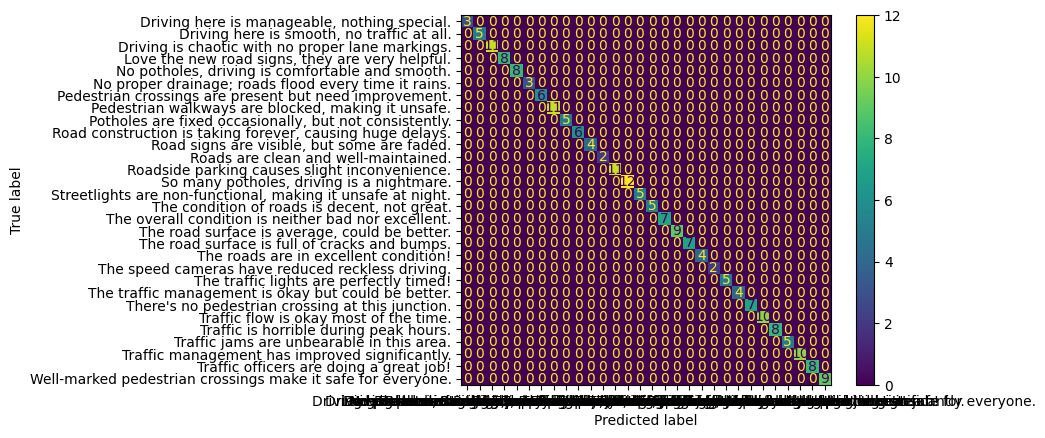

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [16]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Take user input
user_input = input("Enter a feedback about the road service: ")

# Analyze the sentiment of the user input
result = sentiment_analyzer(user_input)

# Display the result
print("Sentiment Analysis Result:", result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Enter a feedback about the road service: Road section of NH-31D is very good
Sentiment Analysis Result: [{'label': 'POSITIVE', 'score': 0.9997962117195129}]


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Enter feedback about the road service (or type 'stop' to end): pathetic condition of NH-31
Feedback recorded with sentiment: NEGATIVE
Enter feedback about the road service (or type 'stop' to end): there is to much potholes in dalkhola islampur section
Feedback recorded with sentiment: NEGATIVE
Enter feedback about the road service (or type 'stop' to end): street light not working at paschim madati toll plaza
Feedback recorded with sentiment: NEGATIVE
Enter feedback about the road service (or type 'stop' to end): very good service at panikauri toll plaza
Feedback recorded with sentiment: POSITIVE
Enter feedback about the road service (or type 'stop' to end): ambulance on NH-31D saved my life
Feedback recorded with sentiment: POSITIVE
Enter feedback about the road service (or type 'stop' to end): NH-31C is very scenic with road funiture
Feedback recorded with sentiment: POSITIVE
Enter feedback about the road service (or type 'stop' to end): toll deducted without my conset
Feedback record

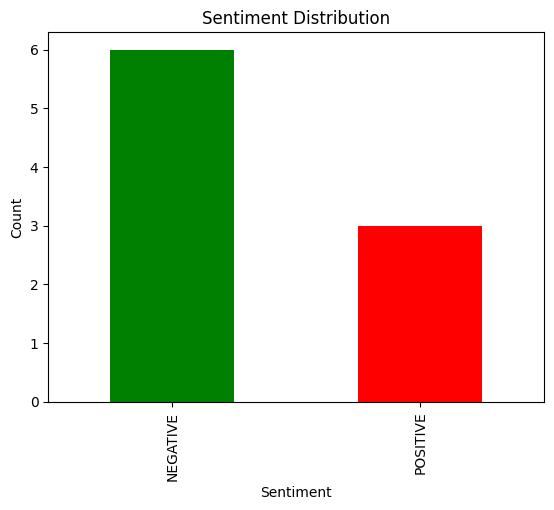

In [18]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Initialize an empty list to store feedback data
feedback_data_list = []

while True:
    # Take user input
    user_input = input("Enter feedback about the road service (or type 'stop' to end): ")
    if user_input.lower() == "stop":
        break

    # Analyze sentiment
    result = sentiment_analyzer(user_input)
    sentiment = result[0]['label']  # Extract the sentiment label (POSITIVE, NEGATIVE)

    # Append the feedback and sentiment to the list as a dictionary
    feedback_data_list.append({"Feedback": user_input, "Sentiment": sentiment})
    print(f"Feedback recorded with sentiment: {sentiment}")

# Create the DataFrame from the list of dictionaries
feedback_data = pd.DataFrame(feedback_data_list)

# Display the collected data
print("\nCollected Feedback Data:")
print(feedback_data)

# Save the feedback data to a CSV file
feedback_data.to_csv("feedback_data.csv", index=False)

# Visualize the sentiment distribution
sentiment_counts = feedback_data["Sentiment"].value_counts()
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"], title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
